<a href="https://colab.research.google.com/github/p204667/SI101-Atividades/blob/master/trabalho5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pedro Igor Marques RA:204667**

 **Guilherme Bonadio de Lima RA:235877**

Sobre o banco de dados do **Titanic**.

In [ ]:
import pandas as pd
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Tratamento dos dados nulos e das strings

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#tratamento dos dados nulos e das strings do banco de treino
train['HasCabin']=1
train.loc[train.Cabin.isnull(),'HasCabin']=0
train.loc[train.Age.isnull(),'Age']=train.Age.mean()
train.loc[train.Embarked.isnull(),'Embarked']='S'
train.loc[train.Fare.isnull(),'Fare']=0
train.Sex=le.fit_transform(train.Sex)
train.Embarked=le.fit_transform(train.Embarked)
#tratamento dos dados nulos e das strings do banco de teste
test['HasCabin']=1
test.loc[test.Cabin.isnull(),'HasCabin']=0
test.loc[test.Age.isnull(),'Age']=test.Age.mean()
test.loc[test.Embarked.isnull(),'Embarked']='S'
test.loc[test.Fare.isnull(),'Fare']=0
test.Sex=le.fit_transform(test.Sex)
test.Embarked=le.fit_transform(test.Embarked)

#Divisão do banco de treino em treino e teste  

In [ ]:
X = train.drop(['Survived','PassengerId','Name','Ticket','Cabin'],axis=1)
y = train.Survived

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=42)

Xprev = test.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)

#DecisionTreeClassifier com hiperparâmetros padrões e sem GridSearch

In [ ]:
Tree = DecisionTreeClassifier()
#normalizando os dados antes
standardScalerSem=StandardScaler()
treinoNormalizado=standardScalerSem.fit_transform(Xtrain)
testeNormalizado=standardScalerSem.transform(Xtest)

Tree.fit(treinoNormalizado,ytrain)
sem=Tree.predict(testeNormalizado)

#DecisionTreeClassifier com GridSearch

In [ ]:
standardScaler = StandardScaler()
DTC=DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42)
pipeline=Pipeline([('transformation',standardScaler),('predictor',DTC)])

params = dict(
    predictor__criterion = ['gini','entropy'],
    predictor__max_depth = [None,1,2,3,4,5,10,20],
    predictor__min_samples_split = [2,3,4,5,10,20],
    predictor__min_samples_leaf = [1,5,10,15,20]
)

In [ ]:
grid=GridSearchCV(pipeline,param_grid=params,cv=5,scoring="accuracy")
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformation',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('predictor',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                       

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
com=grid.predict(Xtest)

0.8233419369318818
{'predictor__criterion': 'gini', 'predictor__max_depth': None, 'predictor__min_samples_leaf': 15, 'predictor__min_samples_split': 2}


#Definindo as funções

In [ ]:
from sklearn.metrics import  confusion_matrix

In [ ]:
def accuracy(target, prediction):
  return (target == prediction).sum()/len(target)

def precision(target, prediction) :
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp+fp)

def recall(target, prediction) :
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp+fn)

def specificity(target, prediction) :
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tn/(tn+fp)

def medida_f(target, prediction) :
  rec = recall(target, prediction)
  prec = precision(target, prediction)
  return 2*rec*prec/(rec+prec)

def all_measures(target,predicted):
  acur = accuracy(target,predicted)
  prec = precision(target,predicted)
  rec = recall(target,predicted)
  spec = specificity(target,predicted)
  f_me = medida_f(target,predicted)
  return round(acur,6),round(prec,6),round(rec,6),round(spec,6),round(f_me,6)

##Gerando as informações para o sem GridSearch

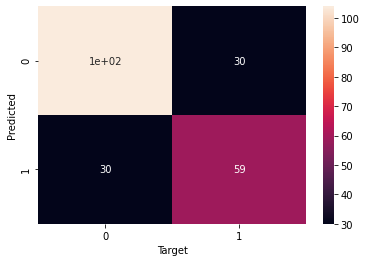

In [ ]:
matrizSem=confusion_matrix(ytest,sem)
sn.heatmap(matrizSem.T, annot = True)
plt.xlabel('Target')
plt.ylabel('Predicted')
plt.show()
SemGrid=all_measures(ytest,sem)

##Gerando as informações para o com GridSearch

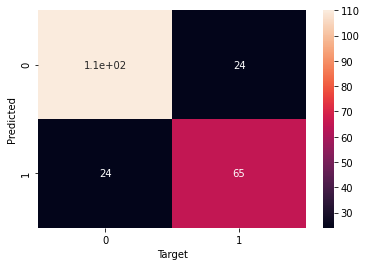

In [ ]:
matrizCom=confusion_matrix(ytest,com)
sn.heatmap(matrizCom.T, annot = True)
plt.xlabel('Target')
plt.ylabel('Predicted')
plt.show()
ComGrid=all_measures(ytest,com)

#Análise

In [ ]:
print(" Accuracy  Precision  Recall Specificity F_measure")
print("%s" % list(SemGrid))
print("%s" % list(ComGrid))

 Accuracy  Precision  Recall Specificity F_measure
[0.730942, 0.662921, 0.662921, 0.776119, 0.662921]
[0.784753, 0.730337, 0.730337, 0.820896, 0.730337]
